# Public Transport Forecasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20241129.csv",encoding = 'ISO-8859-1')

In [3]:
data.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


In [4]:
data.shape

(1918, 7)

In [5]:
data.isnull().sum()

,0
Date,0
Local Route,0
Light Rail,0
Peak Service,0
Rapid Route,0
School,0
Other,20


In [6]:
data['Other'].fillna(data['Other'].mean(), inplace=True)

<ipython-input-6-9ba3352eb776>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Other'].fillna(data['Other'].mean(), inplace=True)


In [7]:
data.duplicated().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1918 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Local Route,1918.0,9891.395203,6120.715714,1.0,3044.5,11417.0,15517.50,21070.0
Light Rail,1918.0,7195.446298,3345.616428,0.0,4463.5,7507.0,10008.25,15154.0
Peak Service,1918.0,179.581335,156.532738,0.0,0.0,193.0,313.75,1029.0
Rapid Route,1918.0,12597.213243,6720.494557,0.0,6383.0,13106.5,17924.75,28678.0
School,1918.0,2352.694995,2494.766306,0.0,0.0,567.5,4914.00,7255.0
Other,1918.0,43.390411,41.528539,0.0,15.0,41.0,67.75,1105.0


In [10]:
data.dtypes

,0
Date,object
Local Route,int64
Light Rail,int64
Peak Service,int64
Rapid Route,int64
School,int64
Other,float64


In [11]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

In [12]:
columns_to_forecast = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']

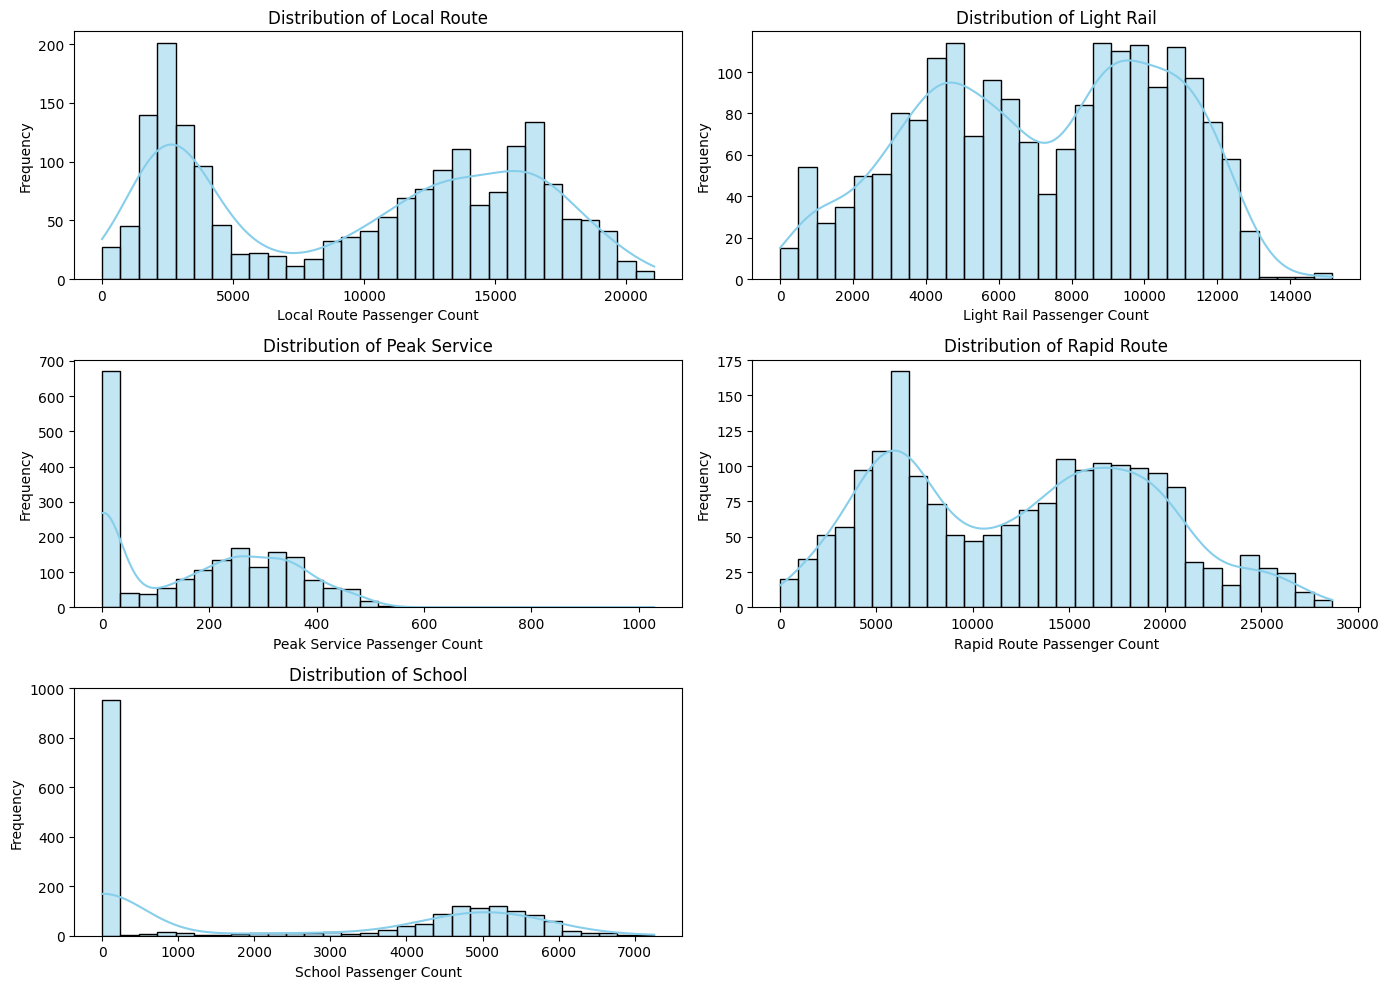

In [13]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(columns_to_forecast):
    plt.subplot(3, 2, i+1)
    sns.histplot(data[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(f'{column} Passenger Count')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

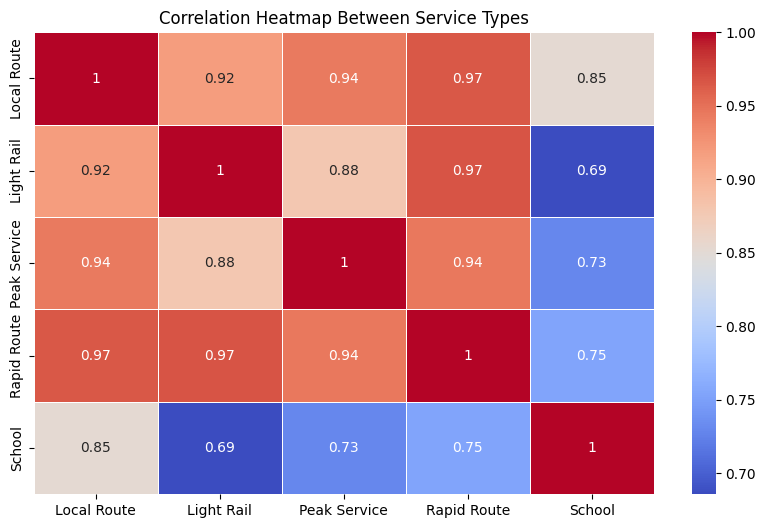

In [14]:
plt.figure(figsize=(10, 6))
correlation_matrix = data[columns_to_forecast].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap Between Service Types')
plt.show()

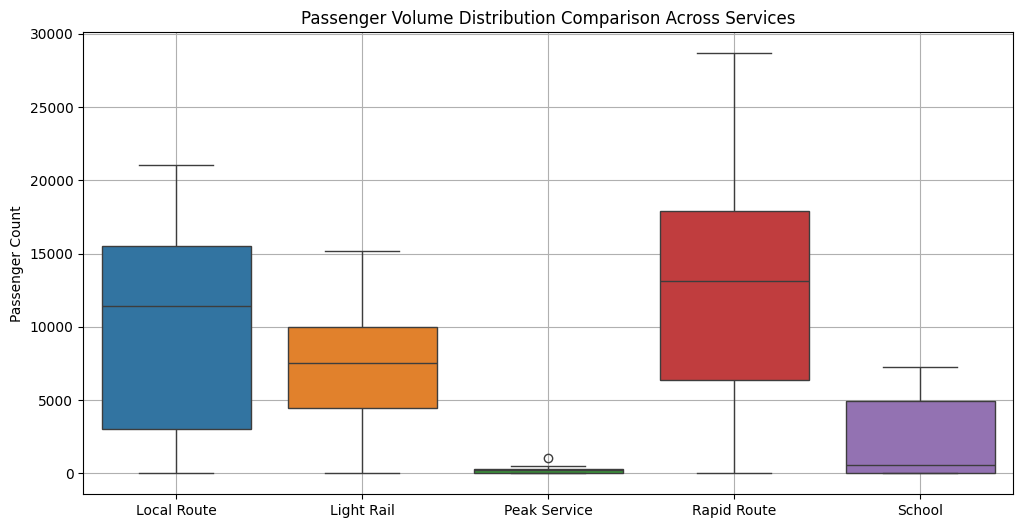

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[columns_to_forecast])
plt.title('Passenger Volume Distribution Comparison Across Services')
plt.ylabel('Passenger Count')
plt.grid(True)
plt.show()


Contribution of Each Service to Total Ridership (%):
Local Route     30.703047
Light Rail      22.334779
Peak Service     0.557423
Rapid Route     39.101949
School           7.302802
dtype: float64


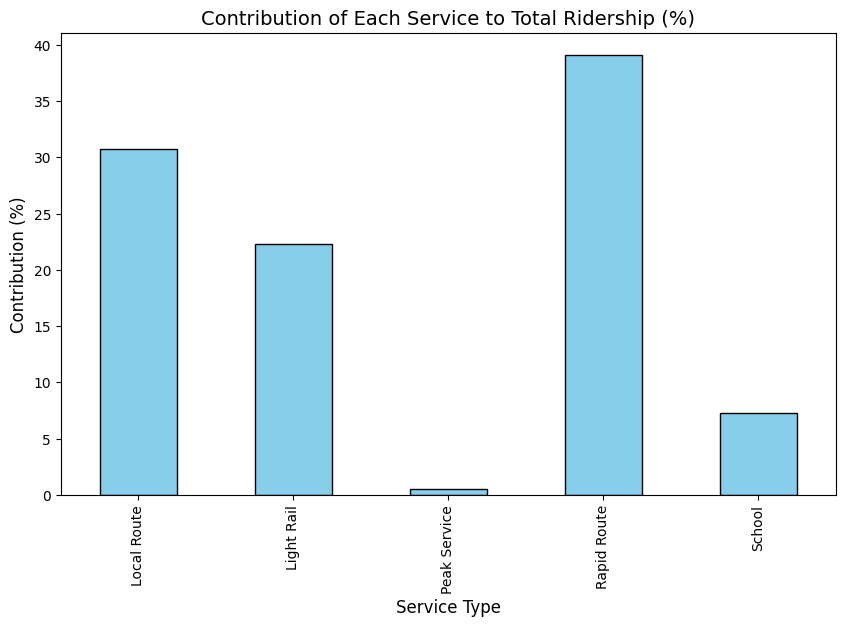

In [16]:
data['Total_Journeys'] = data[columns_to_forecast].sum(axis=1)
service_contributions = data[columns_to_forecast].sum() / data['Total_Journeys'].sum() * 100
print("\nContribution of Each Service to Total Ridership (%):")
print(service_contributions)

plt.figure(figsize=(10, 6))
service_contributions.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Contribution of Each Service to Total Ridership (%)', fontsize=14)
plt.xlabel('Service Type', fontsize=12)
plt.ylabel('Contribution (%)', fontsize=12)
plt.show()

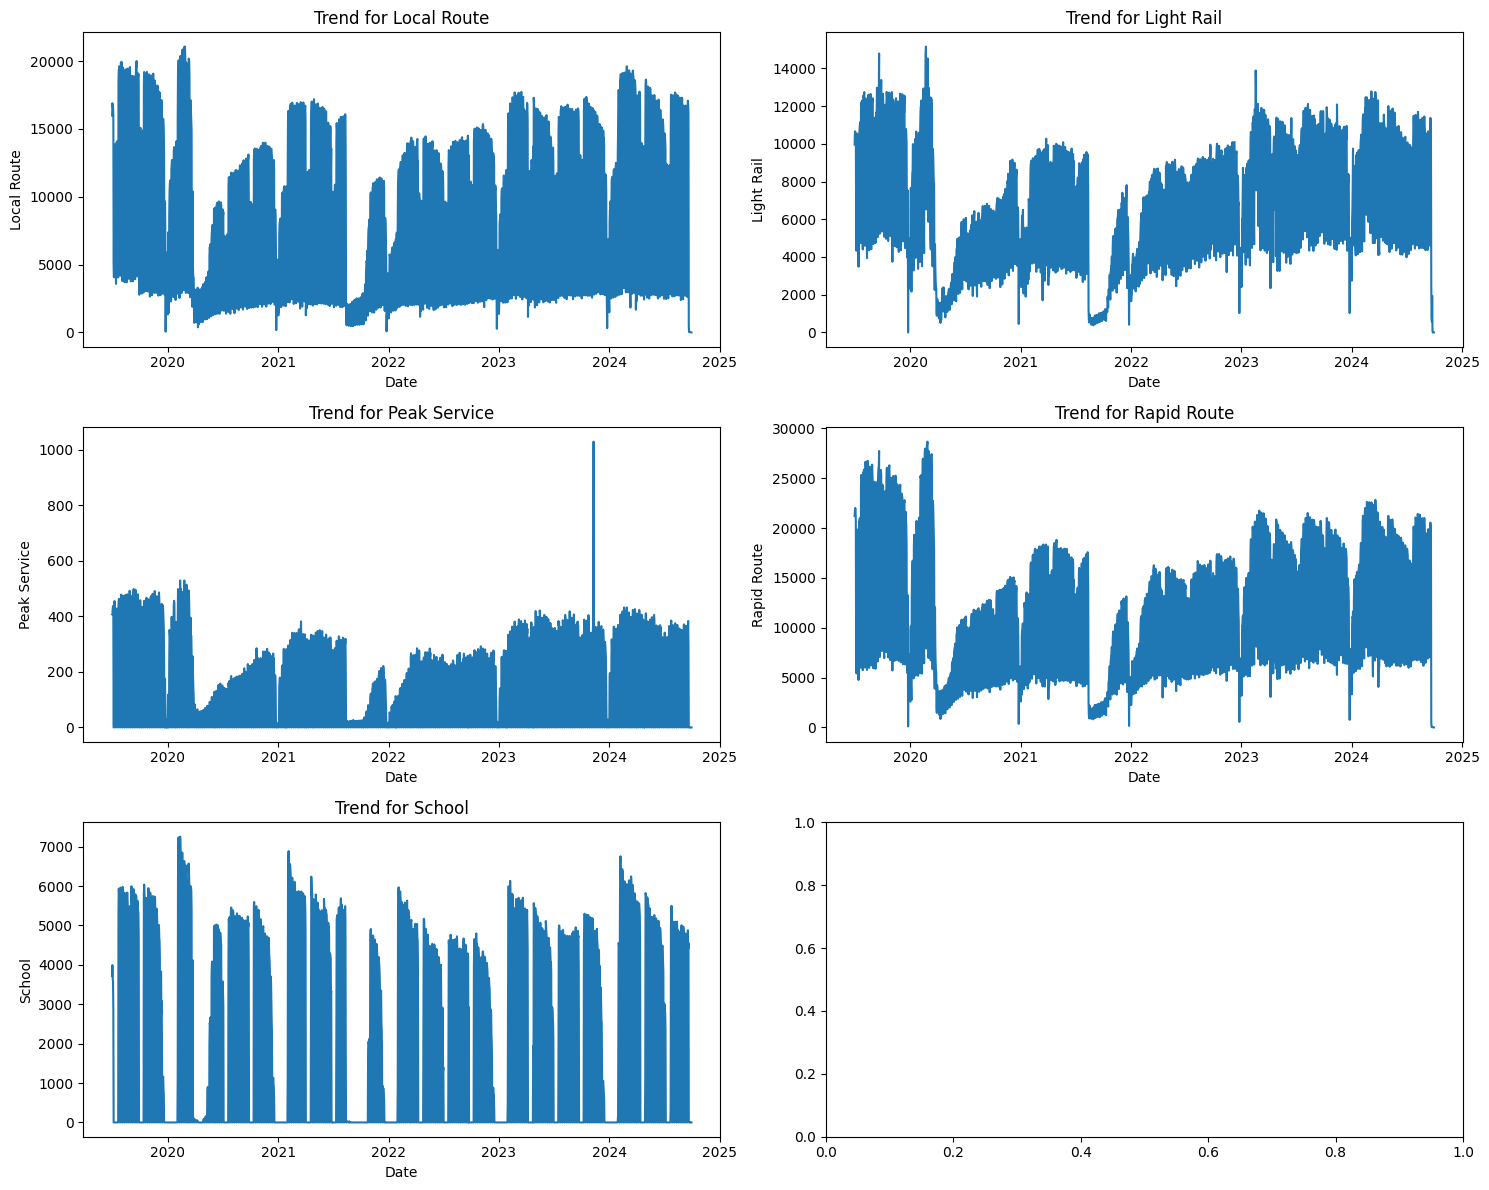

In [17]:
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

for i, col in enumerate(columns_to_forecast):
    sns.lineplot(x='Date', y=col, data=data, ax=axs[i // 2, i % 2])
    axs[i // 2, i % 2].set_title(f'Trend for {col}')

plt.tight_layout()
plt.show()


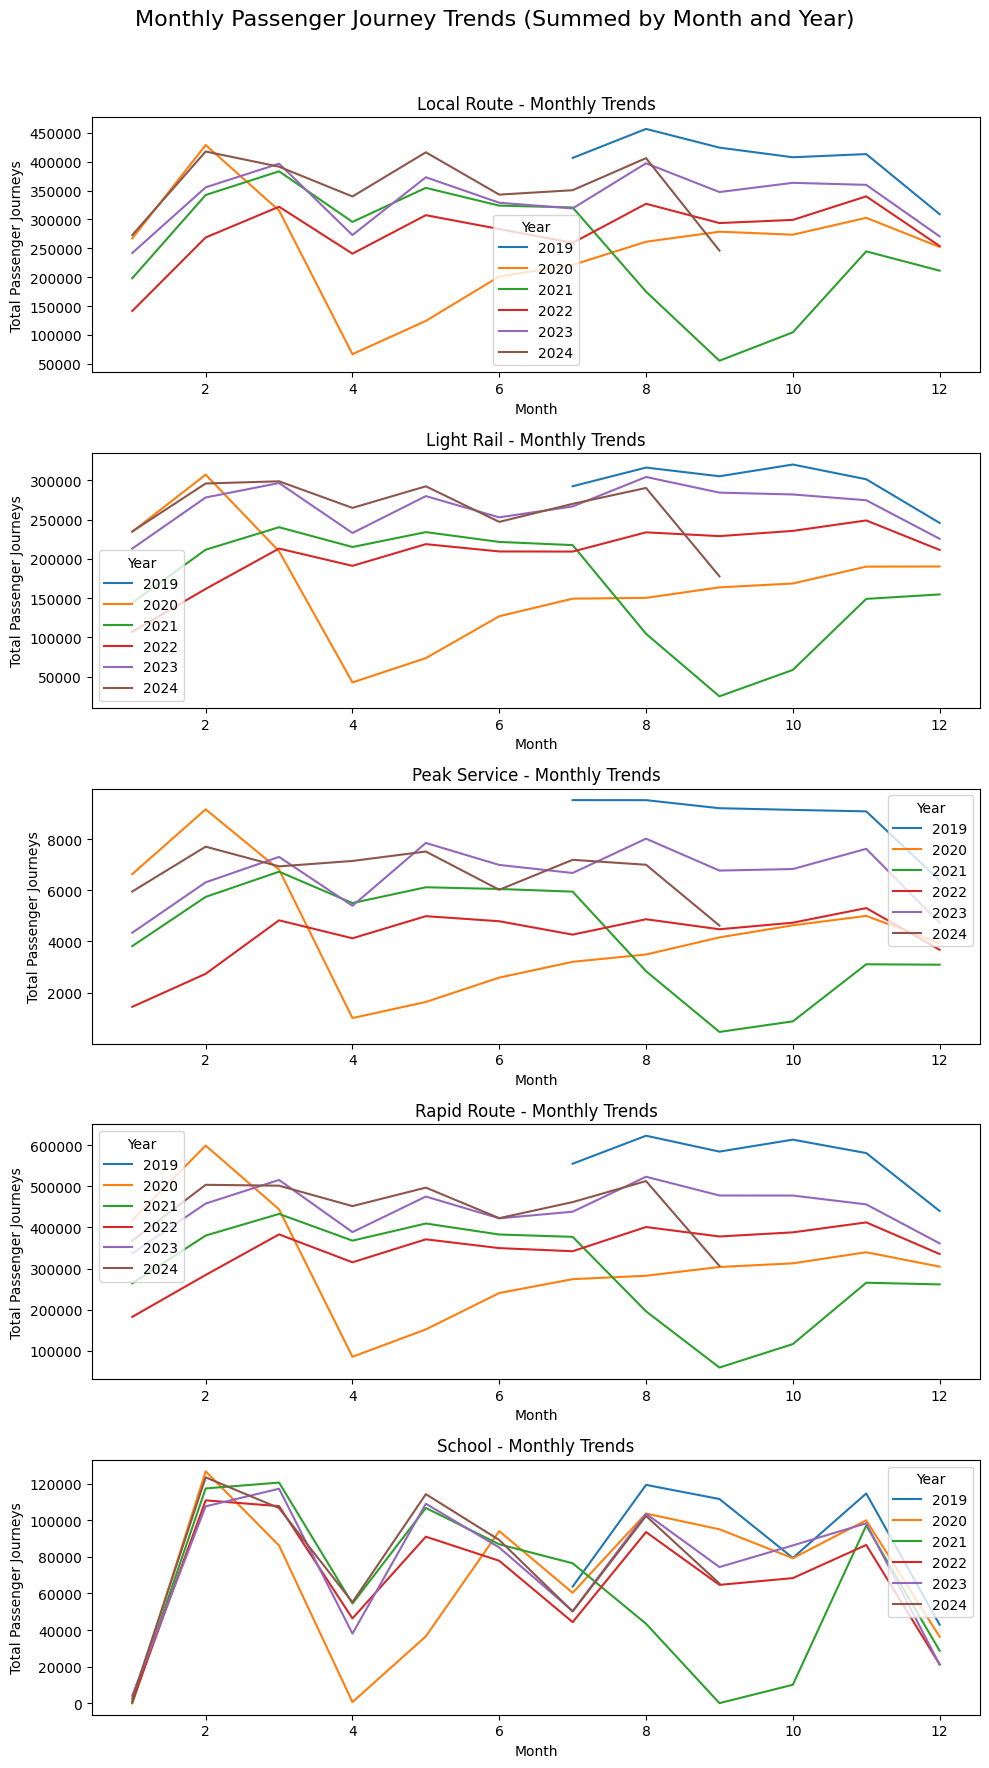

In [18]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

monthly_trends = data.groupby(['Year', 'Month'])[columns_to_forecast].sum().unstack(level=0)

fig, ax = plt.subplots(len(columns_to_forecast), 1, figsize=(10, 18))
fig.suptitle("Monthly Passenger Journey Trends (Summed by Month and Year)", fontsize=16)

for i, column in enumerate(columns_to_forecast):
    monthly_trends[column].plot(ax=ax[i])
    ax[i].set_title(f"{column} - Monthly Trends")
    ax[i].set_xlabel("Month")
    ax[i].set_ylabel("Total Passenger Journeys")

plt.tight_layout(rect=[0, 0, 1, 0.96])

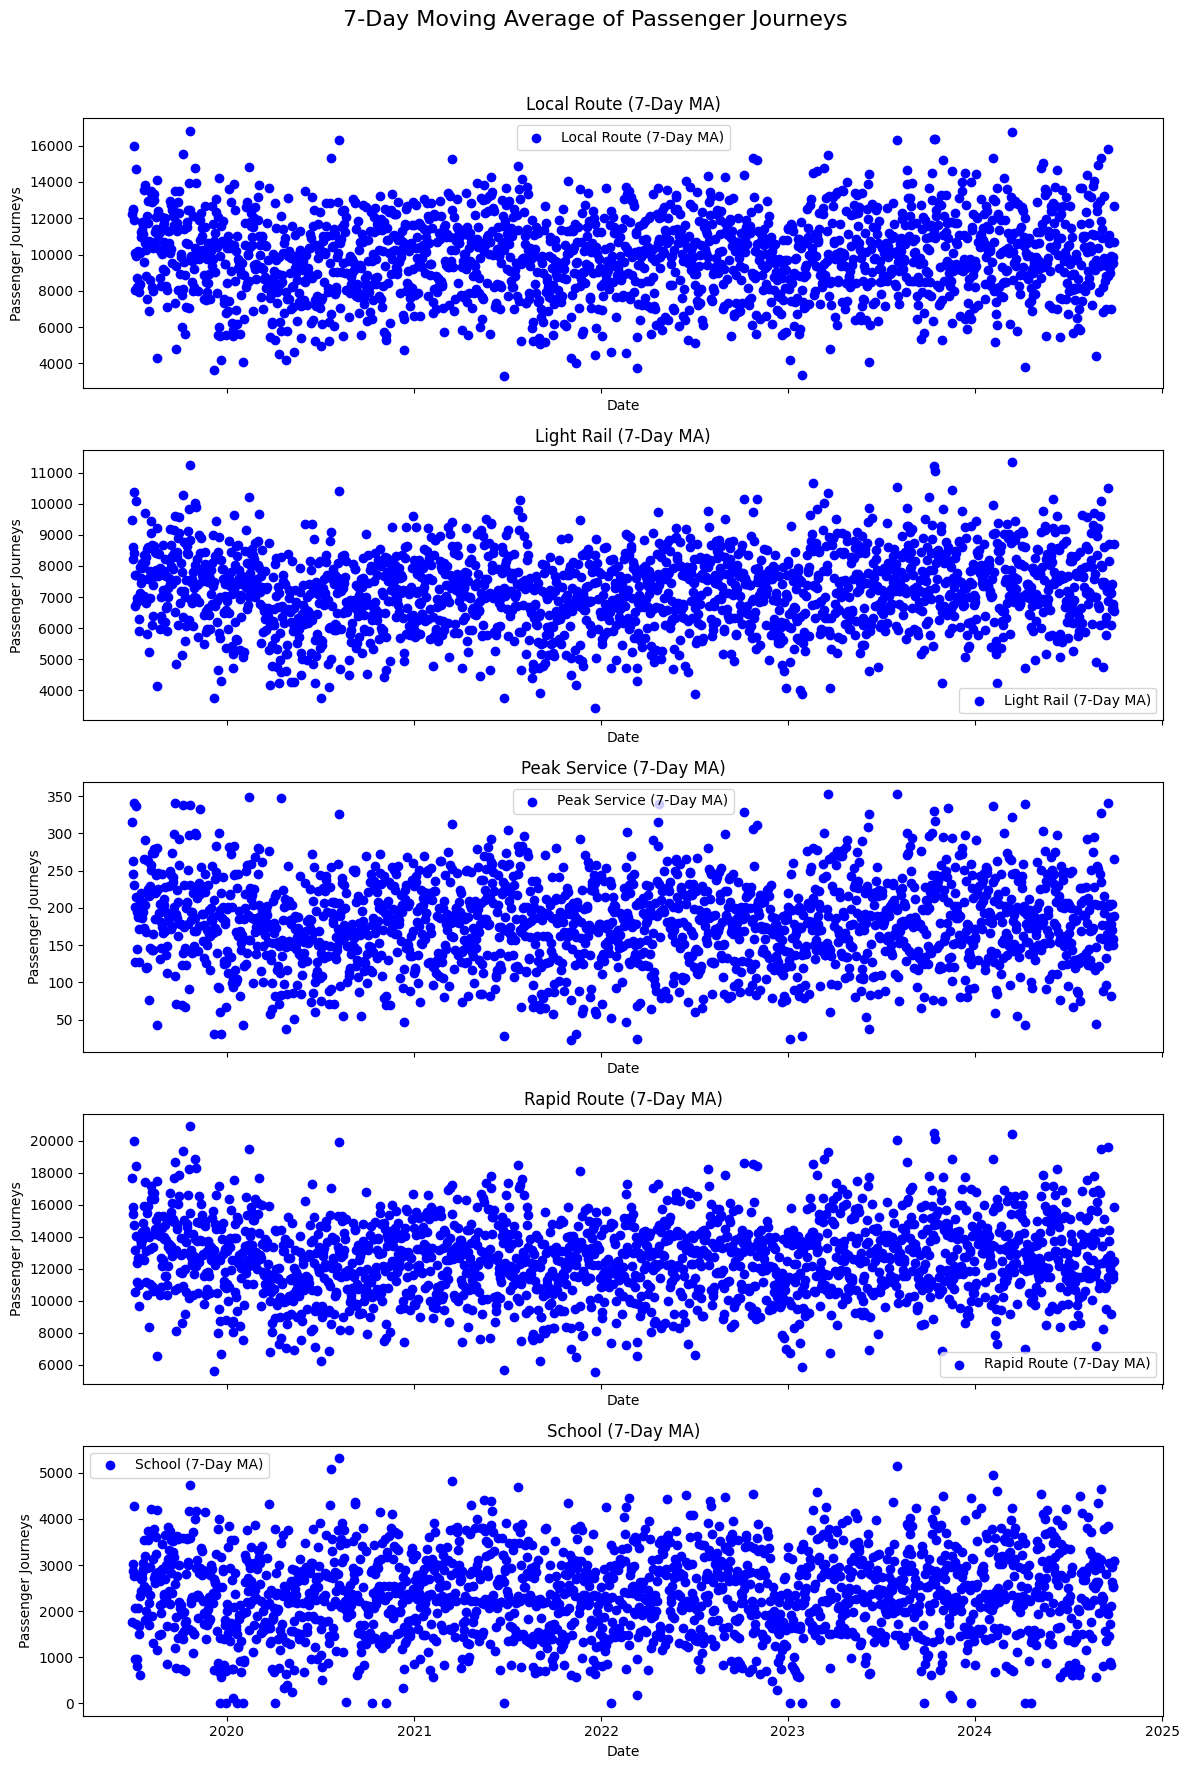

In [19]:
moving_avg = data.set_index('Date')[columns_to_forecast].rolling(window=7).mean()

fig, axs = plt.subplots(len(columns_to_forecast), 1, figsize=(12, 18), sharex=True)
fig.suptitle("7-Day Moving Average of Passenger Journeys", fontsize=16)

for i, column in enumerate(columns_to_forecast):
    axs[i].scatter(moving_avg.index, moving_avg[column], label=f"{column} (7-Day MA)", color='blue')
    axs[i].set_title(f"{column} (7-Day MA)")
    axs[i].set_xlabel("Date")
    axs[i].set_ylabel("Passenger Journeys")
    axs[i].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [20]:
data.set_index('Date', inplace=True)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkwplxxg3/q1c29_2b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkwplxxg3/lh0q4lom.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18417', 'data', 'file=/tmp/tmpkwplxxg3/q1c29_2b.json', 'init=/tmp/tmpkwplxxg3/lh0q4lom.json', 'output', 'file=/tmp/tmpkwplxxg3/prophet_modeln_yqqvn8/prophet_model-20241129042604.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:26:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:26:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


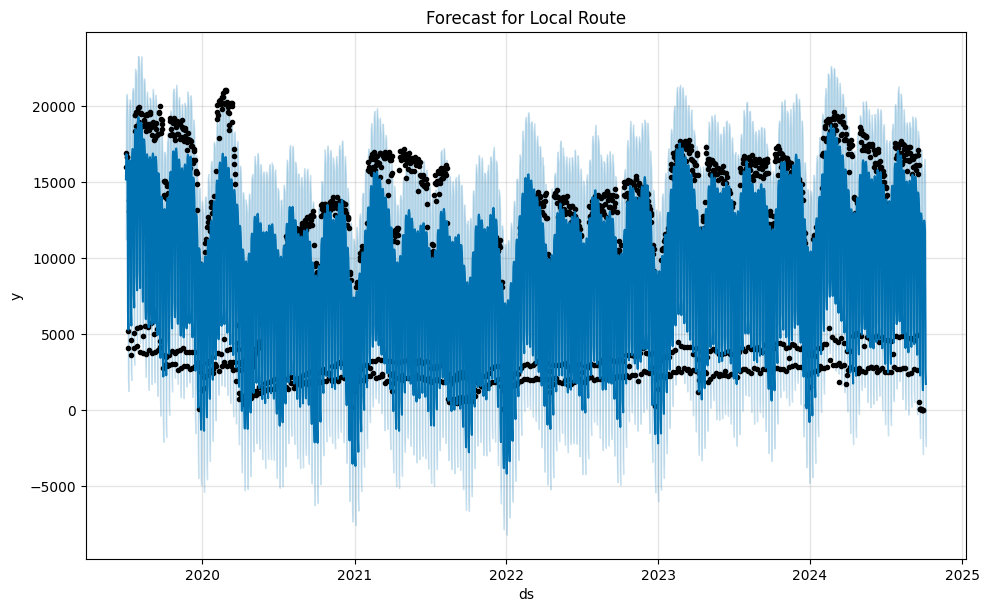

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkwplxxg3/nuwppaza.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkwplxxg3/pdtgqha4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76540', 'data', 'file=/tmp/tmpkwplxxg3/nuwppaza.json', 'init=/tmp/tmpkwplxxg3/pdtgqha4.json', 'output', 'file=/tmp/tmpkwplxxg3/prophet_model6tdd37bj/prophet_model-20241129042606.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:26:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:26:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


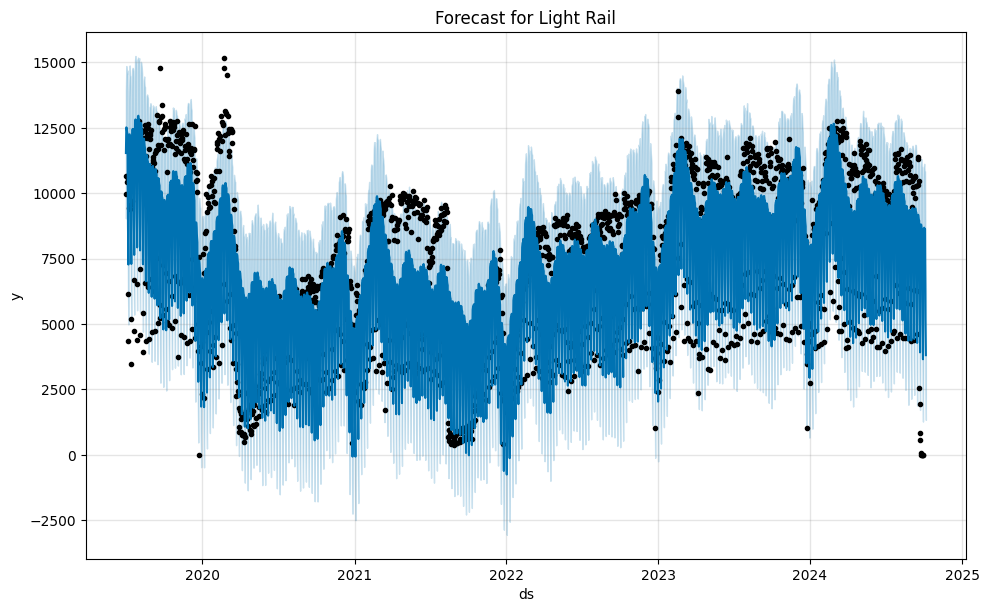

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkwplxxg3/epcus1is.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkwplxxg3/rhoy3re2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4563', 'data', 'file=/tmp/tmpkwplxxg3/epcus1is.json', 'init=/tmp/tmpkwplxxg3/rhoy3re2.json', 'output', 'file=/tmp/tmpkwplxxg3/prophet_modeluxxtik95/prophet_model-20241129042607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:26:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:26:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


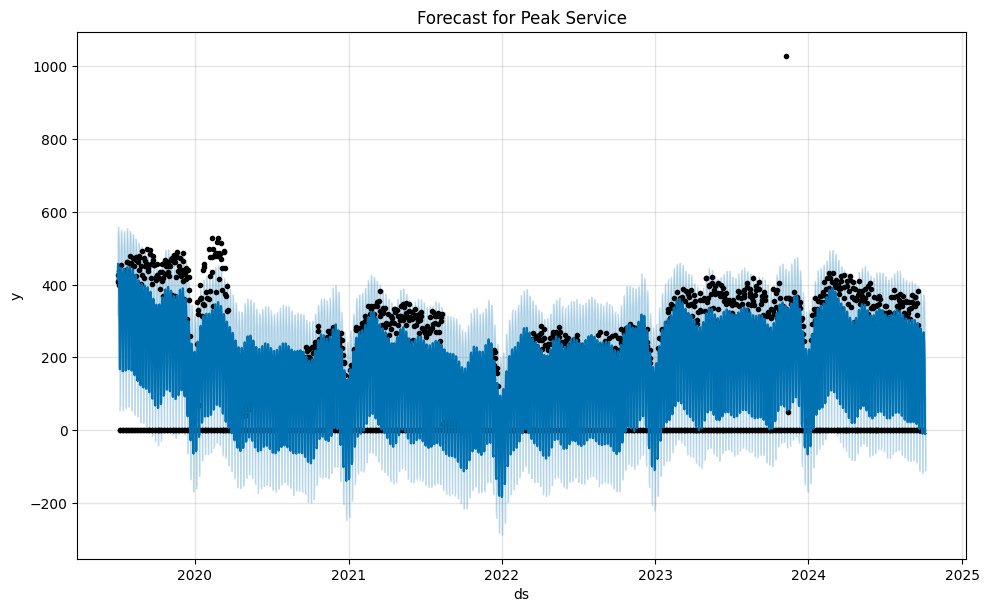

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkwplxxg3/_wdsxrb2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkwplxxg3/_r_fcupt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24966', 'data', 'file=/tmp/tmpkwplxxg3/_wdsxrb2.json', 'init=/tmp/tmpkwplxxg3/_r_fcupt.json', 'output', 'file=/tmp/tmpkwplxxg3/prophet_modelsj_i58rd/prophet_model-20241129042609.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:26:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:26:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


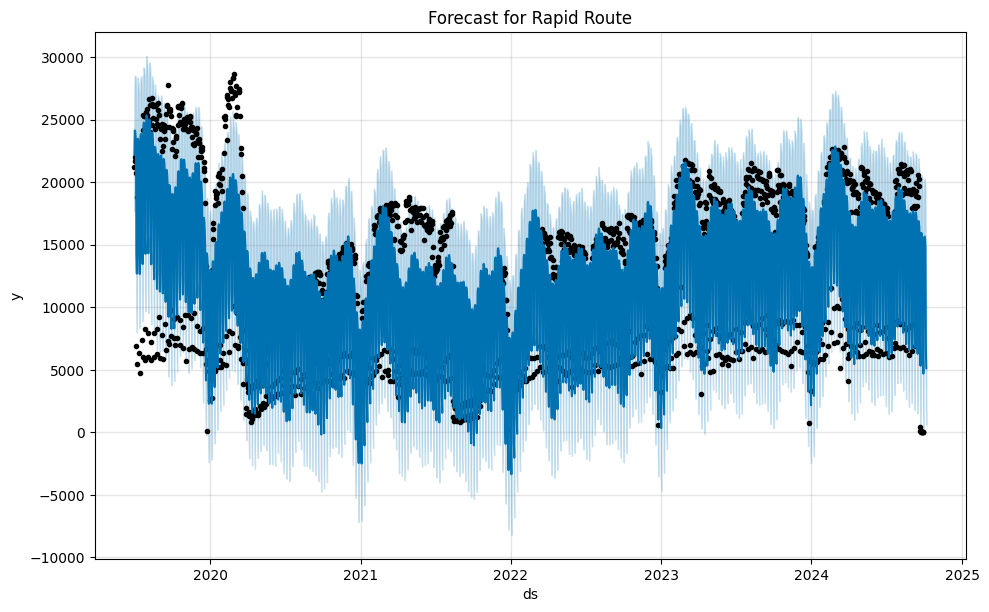

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkwplxxg3/_f396w6g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkwplxxg3/b2x1ia2_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47718', 'data', 'file=/tmp/tmpkwplxxg3/_f396w6g.json', 'init=/tmp/tmpkwplxxg3/b2x1ia2_.json', 'output', 'file=/tmp/tmpkwplxxg3/prophet_modelj3b3amc_/prophet_model-20241129042611.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:26:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:26:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


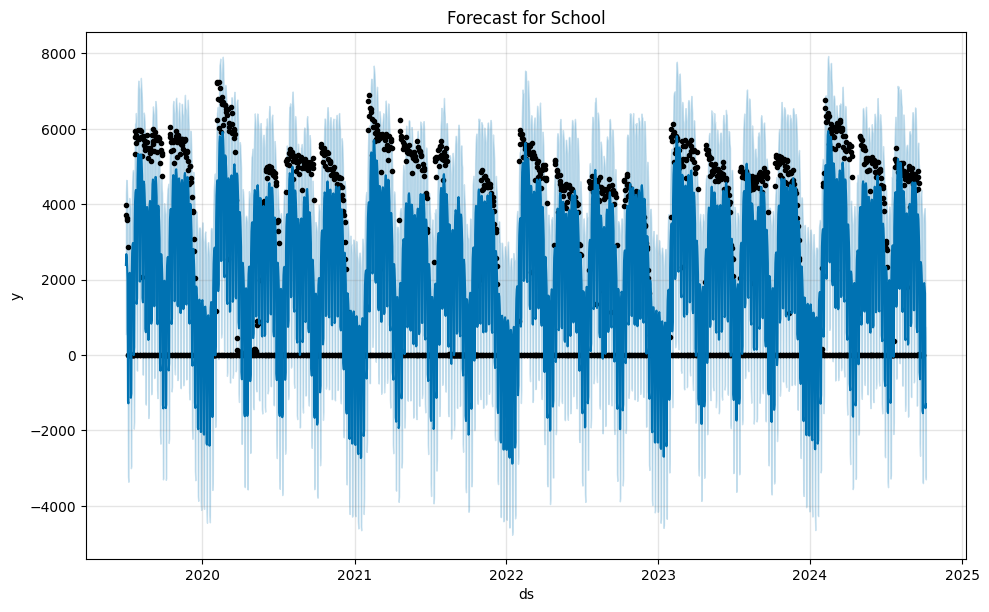

In [21]:
## using Prophet TIME SERIES MODEL
from prophet import Prophet


forecasts = {}
for col in columns_to_forecast:
    df_prophet = data[[col]].reset_index().rename(columns={'Date': 'ds', col: 'y'})
    model = Prophet()
    model.fit(df_prophet)

    future = model.make_future_dataframe(periods=7)
    forecast = model.predict(future)
    forecasts[col] = forecast[['ds', 'yhat']].tail(7)

    model.plot(forecast)
    plt.title(f'Forecast for {col}')
    plt.show()


In [22]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np

y_true = df_prophet['y']
y_pred = forecast['yhat'][:len(y_true)]

mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"RMSE: {rmse}")

MAE: 2675.9214919253463
MAPE: 5.611482241021047e+18
RMSE: 3212.866145236866


In [23]:
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-07-01,2799.087825,471.455771,4350.515122,2799.087825,2799.087825,-410.739441,-410.739441,-410.739441,659.919186,659.919186,659.919186,-1070.658627,-1070.658627,-1070.658627,0.0,0.0,0.0,2388.348384
1,2019-07-02,2797.802695,905.388360,4766.587799,2797.802695,2797.802695,-120.385674,-120.385674,-120.385674,1100.540214,1100.540214,1100.540214,-1220.925888,-1220.925888,-1220.925888,0.0,0.0,0.0,2677.417021
2,2019-07-03,2796.517564,732.132541,4578.079414,2796.517564,2796.517564,-206.566138,-206.566138,-206.566138,1151.149687,1151.149687,1151.149687,-1357.715826,-1357.715826,-1357.715826,0.0,0.0,0.0,2589.951426
3,2019-07-04,2795.232434,209.306851,4246.360598,2795.232434,2795.232434,-461.012511,-461.012511,-461.012511,1017.452808,1017.452808,1017.452808,-1478.465319,-1478.465319,-1478.465319,0.0,0.0,0.0,2334.219923
4,2019-07-05,2793.947304,54.590242,3883.668217,2793.947304,2793.947304,-807.038224,-807.038224,-807.038224,773.799362,773.799362,773.799362,-1580.837585,-1580.837585,-1580.837585,0.0,0.0,0.0,1986.909080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,2024-10-02,2607.496862,-65.853313,4055.778693,2607.496862,2607.496862,-698.306297,-698.306297,-698.306297,1151.149687,1151.149687,1151.149687,-1849.455984,-1849.455984,-1849.455984,0.0,0.0,0.0,1909.190565
1921,2024-10-03,2607.998330,-46.653810,3729.264515,2607.998330,2607.998330,-796.473369,-796.473369,-796.473369,1017.452808,1017.452808,1017.452808,-1813.926177,-1813.926177,-1813.926177,0.0,0.0,0.0,1811.524961
1922,2024-10-04,2608.499798,-312.908640,3622.063392,2608.499798,2608.499798,-979.175614,-979.175614,-979.175614,773.799362,773.799362,773.799362,-1752.974975,-1752.974975,-1752.974975,0.0,0.0,0.0,1629.324184
1923,2024-10-05,2609.001266,-3388.453645,417.837954,2609.001266,2609.001266,-4019.417480,-4019.417480,-4019.417480,-2351.579036,-2351.579036,-2351.579036,-1667.838444,-1667.838444,-1667.838444,0.0,0.0,0.0,-1410.416213


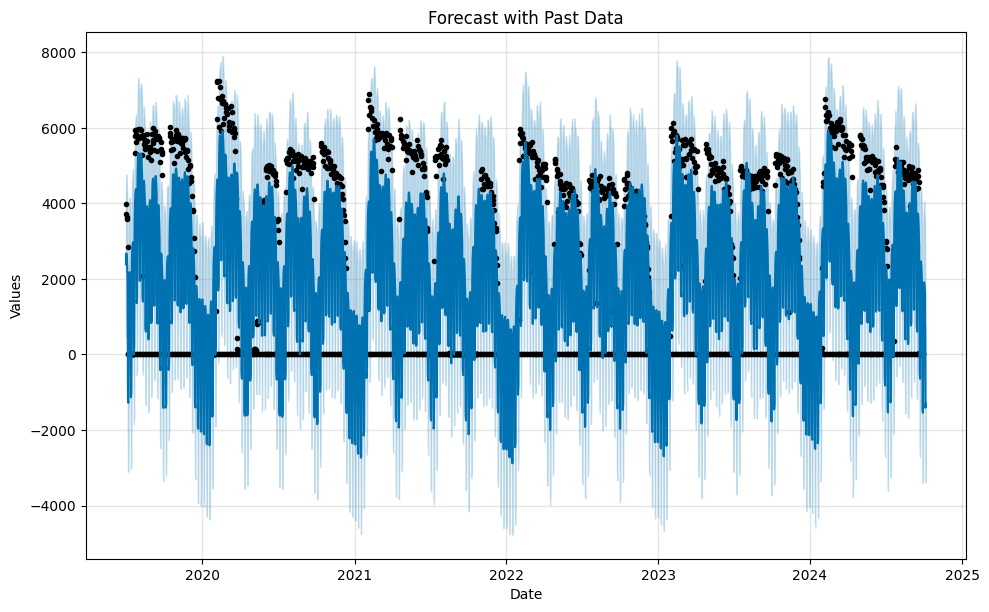

In [24]:
fig = model.plot(forecast)
plt.title("Forecast with Past Data")
plt.xlabel("Date")
plt.ylabel("Values")
plt.show()